In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import warnings
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("..\\dataset_machine_learning.csv")

In [3]:
df

,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,yr_built,renovated,yr_renovated,zipcode,city_encoded,lat,long,sqm_living15,sqm_lot15
0,0,790000,3,2.50,241.55,441.29,1.0,False,0,4,9,1951,False,1951,98117,11,47.6833,-122.400,221.11,441.29
1,0,555000,4,2.50,307.51,603.87,2.0,False,0,3,8,2012,False,2012,98065,15,47.5150,-121.870,221.11,464.52
2,0,440000,4,2.25,200.67,754.28,1.0,False,0,3,8,1966,False,1966,98006,21,47.5443,-122.177,171.87,836.13
3,0,295000,2,2.50,151.43,127.09,2.0,False,0,3,7,2009,False,2009,98106,11,47.5489,-122.363,147.72,214.23
4,0,470000,5,2.50,205.32,896.98,1.0,False,0,3,8,1976,False,1976,98011,14,47.7698,-122.222,193.24,802.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19251,377,183000,3,1.00,108.70,680.05,1.0,False,0,3,7,1962,False,1962,98188,11,47.4685,-122.282,189.52,680.05
19252,377,359000,2,2.75,127.28,105.91,2.0,False,0,3,8,2009,False,2009,98133,11,47.7052,-122.343,127.28,101.26
19253,378,450000,5,2.00,173.73,682.28,1.5,False,0,3,7,1960,False,1960,98007,21,47.5951,-122.144,173.73,710.71
19254,387,445500,2,1.75,129.14,619.66,1.0,False,0,3,6,1941,False,1941,98115,11,47.6914,-122.308,85.47,592.72


In [4]:
X1 = df['sqm_living'].values.reshape(-1,1)
X2 = df['grade'].values.reshape(-1,1)
X3 = df[['grade', 'sqm_living']]
X4 = df.drop(columns=['price'])
y = df['price'].values.reshape(-1,1)

df_mean_price = df.groupby('grade').agg(mean_price=('price', 'mean'))

Xmean = df_mean_price.index.values.reshape(-1,1)
ymean = df_mean_price['mean_price'].values.reshape(-1,1)

In [5]:
LinearRegression_model = LinearRegression()

### Feature `sqm_living`

0.4700649106288569


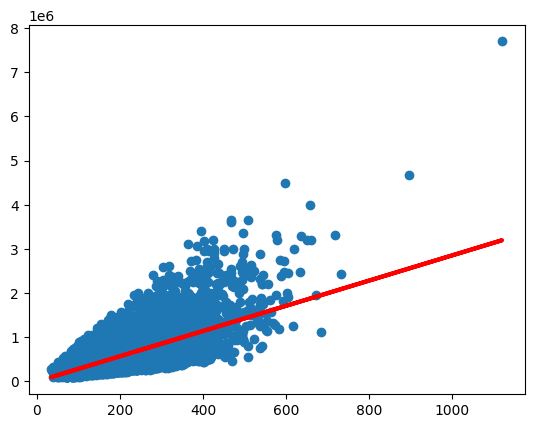

In [6]:
LinearRegression_model.fit(X1,y)
print(f"{LinearRegression_model.score(X1,y)}")

prediction1 = LinearRegression_model.predict(X1)
plt.scatter(X1,y)
plt.plot(X1, prediction1, c="r", lw=3)

### Feature `grade`

0.43724053586845335


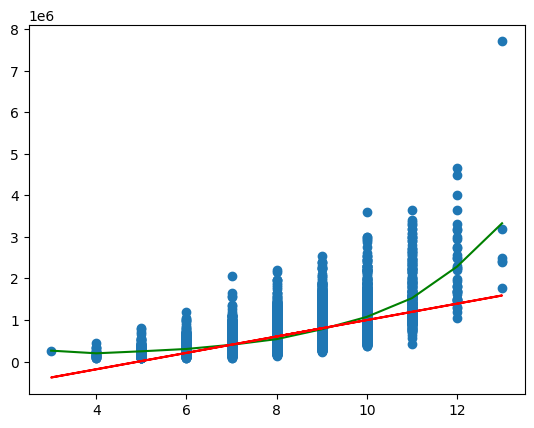

In [7]:
LinearRegression_model.fit(X2,y)
print(f"{LinearRegression_model.score(X2,y)}")

prediction2 = LinearRegression_model.predict(X2)
plt.scatter(X2,y)
plt.plot(Xmean, ymean, c="g")
plt.plot(X2, prediction2, c="r")

### Feature `sqm_living` & `grade`

In [8]:
LinearRegression_model.fit(X3,y)
LinearRegression_model.score(X3,y)

0.5223262121808192

### All features

In [9]:
LinearRegression_model.fit(X4,y)
LinearRegression_model.score(X4,y)

0.7265944582750277